# 東京エレクトロン株価（日足）

In [34]:
import datetime

import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [58]:
list_date = [
    '2024-11-01',
    '2024-11-05',
    '2024-11-06',
    '2024-11-07',
    '2024-11-08',
]
td = datetime.timedelta(days=1)

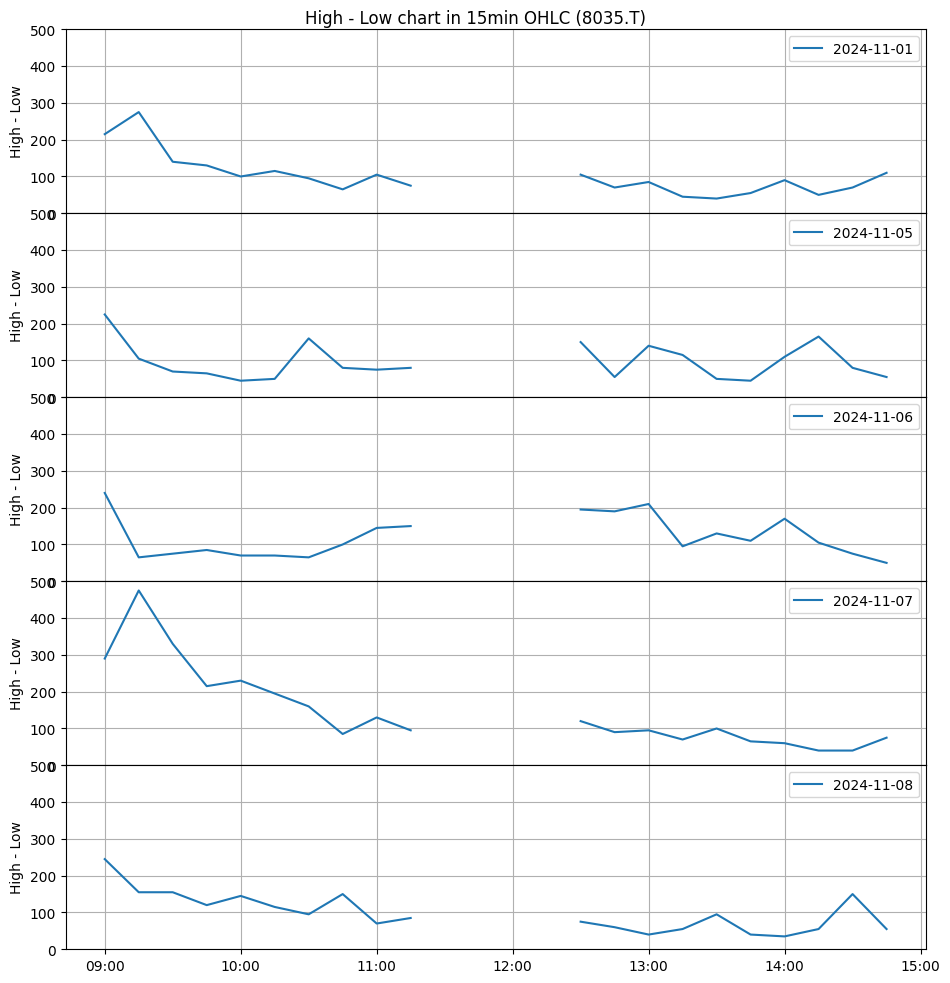

In [60]:
symbol = '8035.T'
ticker = yf.Ticker(symbol)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    top=0.96,
    bottom=0.04,
    left=0.09,
    right=0.95,
)

n = len(list_date)
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0,
    hspace=0.0,
)
ax = dict()
for i, axis in enumerate(gs.subplots()):
    ax[i] = axis

for i, t in enumerate(list_date):
    dt_start = pd.to_datetime(t)
    dt_end = dt_start + td
    
    df = ticker.history(period='1d', interval='15m', start=dt_start, end=dt_end)
    ser_range = df['High'] - df['Low']
    str_date = str(ser_range.index[0].date())
    dt_noon1 = pd.to_datetime('%s 11:30:00+09:00' % str_date)
    dt_noon2 = pd.to_datetime('%s 12:30:00+09:00' % str_date)
    
    ser_range_1h = ser_range[ser_range.index < dt_noon1]
    ser_range_1h.index = [t + datetime.timedelta(hours=9) for t in ser_range_1h.index]
    ser_range_2h = ser_range[ser_range.index >= dt_noon2]
    ser_range_2h.index = [t + datetime.timedelta(hours=9) for t in ser_range_2h.index]
    
    color = 'C0'
    ax[i].plot(ser_range_1h, color=color, label=str_date)
    ax[i].plot(ser_range_2h, color=color)

    if i < n - 1:
        ax[i].set_xticks(ax[i].get_xticks(), labels='')
    else:
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].set_ylim(0, 500)
    ax[i].set_ylabel('High - Low')
    ax[i].grid()
    ax[i].legend()
    
plt.suptitle('High - Low chart in 15min OHLC (%s)' % symbol)
plt.savefig('report_8035_delta_15m.png')
plt.show()